In [3]:
'''
Deep Learning Stock Price Predictor 
Author: Gil Akos
Objective: Create Benchmark Model with scikit learn regression
'''

'\nDeep Learning Stock Price Predictor \nAuthor: Gil Akos\nObjective: Create Benchmark Model with scikit learn regression\n'

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Import required libraries for Machine Learning
import math
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing

#Import required libraries for Yahoo Finance API
import yahoo_finance as yf
from yahoo_finance import Share

#Import required libraries for visualization and printing
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [5]:
#Set Benchmark Dates
date_start, date_end = '2009-01-01', '2009-06-18'#'2015-06-18'

#Set Model Baseline Ticker
base_ticker = 'SPY'

#Set Additional Tickers

In [6]:
#Request Stock Data
stock_data = Share(base_ticker)
stock_historical = stock_data.get_historical(date_start,date_end)

#pprint(stock_historical)

#Define columns of data to keep from historical stock data
stock_item = []
stock_date = []
stock_close = []
stock_volume = []

#Loop through the stock data objects backwards and store factors we want to keep
i_counter = 0
for i in xrange(len(stock_historical)-1,-1,-1):
    d = stock_historical[i]
    stock_item.append(i_counter)
    stock_date.append(d['Date'])
    stock_close.append(d['Adj_Close'])
    stock_volume.append(d['Volume'])
    i_counter += 1

#Create a dataframe for stock data
stock_df = pd.DataFrame()
    
#Add factors to dataframe
stock_df['Item'] = stock_item
stock_df['Date'] = stock_date
stock_df['Adj_Close'] = pd.to_numeric(stock_close)
stock_df['Volume'] = pd.to_numeric(stock_volume)

#Print the dataframe head and tail
print(stock_df.head())
print("---")
print(stock_df.tail())

   Item        Date  Adj_Close     Volume
0     0  2009-01-02  78.738477  227566300
1     1  2009-01-05  78.645305  240349700
2     2  2009-01-06  79.170456  328260900
3     3  2009-01-07  76.798813  280899200
4     4  2009-01-08  77.112211  263834400
---
     Item        Date  Adj_Close     Volume
111   111  2009-06-12  81.110574  184361800
112   112  2009-06-15  79.250865  224190500
113   113  2009-06-16  78.175986  227319000
114   114  2009-06-17  78.099212  223445200
115   115  2009-06-18  78.670772  211725100


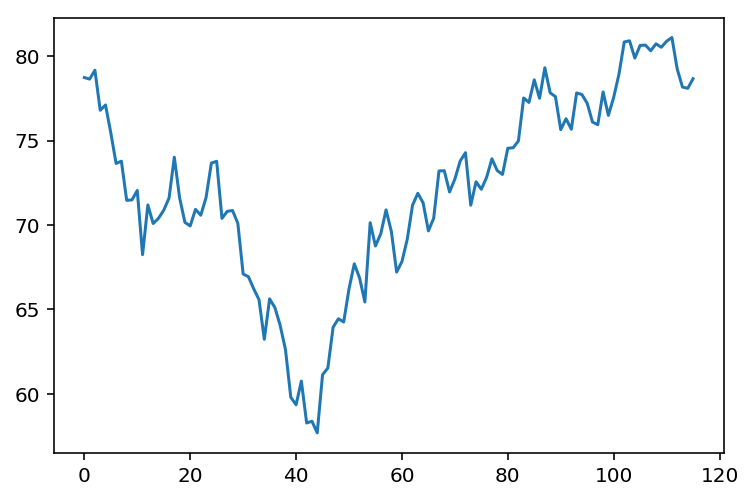

In [7]:
#Plot Basic Data
fig, ax = plt.subplots()
ax.plot(stock_df['Adj_Close'])

# format the coords message box
def price(x):
    return '$%1.2f' % x
#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price

plt.show()

In [20]:
#Define Test/Train Split 
tt_split = .20
tti_split = int(math.floor(len(stock_df['Item'])*tt_split))

X_scaled = np.array(preprocessing.scale(stock_df['Item']))
y_scaled = np.array(preprocessing.scale(stock_df['Adj_Close']))

'''
#Set up training and test sets
X_train = X_scaled[:-tti_split]
X_test = X_scaled[-tti_split:]

y_train = y_scaled[:-tti_split]
y_test = y_scaled[-tti_split:]
'''

'\n#Set up training and test sets\nX_train = X_scaled[:-tti_split]\nX_test = X_scaled[-tti_split:]\n\ny_train = y_scaled[:-tti_split]\ny_test = y_scaled[-tti_split:]\n'

In [21]:
# Split the data into test and training sets, with 30% of samples being put into the test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=17)


#Print test sets to verify
print(X_test)
print(y_test)

[[-1.71718314 -1.68731909 -1.65745503 -1.62759098 -1.59772692 -1.56786287
  -1.53799882 -1.50813476 -1.47827071 -1.44840665 -1.4185426  -1.38867854
  -1.35881449 -1.32895043 -1.29908638 -1.26922232 -1.23935827 -1.20949421
  -1.17963016 -1.1497661  -1.11990205 -1.090038   -1.06017394 -1.03030989
  -1.00044583 -0.97058178 -0.94071772 -0.91085367 -0.88098961 -0.85112556
  -0.8212615  -0.79139745 -0.76153339 -0.73166934 -0.70180528 -0.67194123
  -0.64207718 -0.61221312 -0.58234907 -0.55248501 -0.52262096 -0.4927569
  -0.46289285 -0.43302879 -0.40316474 -0.37330068 -0.34343663 -0.31357257
  -0.28370852 -0.25384446 -0.22398041 -0.19411636 -0.1642523  -0.13438825
  -0.10452419 -0.07466014 -0.04479608 -0.01493203  0.01493203  0.04479608
   0.07466014  0.10452419  0.13438825  0.1642523   0.19411636  0.22398041
   0.25384446  0.28370852  0.31357257  0.34343663  0.37330068  0.40316474
   0.43302879  0.46289285  0.4927569   0.52262096  0.55248501  0.58234907
   0.61221312  0.64207718  0.67194123  

In [22]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

'''
# Print the coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
'''

ValueError: Found array with 0 sample(s) (shape=(0, 116)) while a minimum of 1 is required.